In [322]:
# !pip show matplotlib

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
# !pip install seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
import altair as alt


C:\Users\fredg\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\fredg\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\fredg\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,Query length,Similarity threshold,Precision score,Recall score,F1 score,TP rate,FP rate
505,3 words,0.00,0.39,0.63,0.48,0.63,0.98
506,3 words,0.01,0.39,0.63,0.48,0.63,0.98
507,3 words,0.02,0.39,0.63,0.48,0.63,0.98
508,3 words,0.03,0.39,0.63,0.48,0.63,0.98
509,3 words,0.04,0.39,0.63,0.48,0.63,0.98


In [12]:
# grouping function
def transfo(filename, threshold, asin):
    df_full = pd.read_csv(filename)
    # df1 = df1[["index","threshold","accuracy","Precision","Recall","F1","Precision_asin","F1_asin"]]
    cols = ["Precision", "Recall", "F1"]
    if asin:
        cols = [x + "_asin" for x in cols]
    
    df_filt = df_full[df_full["threshold"] == threshold]
    
    gb = df_filt.groupby(['n_words','TOP_N'])[cols].min().reset_index()
    gb["n_words"] = gb["n_words"].apply(lambda x: "{} words".format(str(int(x))))
    gb3 = gb[gb["TOP_N"]==3]
    del gb3["TOP_N"]
    gb5 = gb[gb["TOP_N"]==5]
    del gb5["TOP_N"]
    gb3.columns = ["n_words","Precision", "Recall", "F1"]
    gb5.columns = ["n_words","Precision", "Recall", "F1"]
    
    return gb3, gb5
    # return gb3, gb5

filename = "datasets/M2R1+_results.csv"
# filename = "datasets/other_resultsB.csv"
# df_full = pd.read_csv(filename)
threshold = 0.0
df_filt3, df_filt5 = transfo(filename, threshold, asin = False)
df_asin3, df_asin5 = transfo(filename, threshold, asin = True)


filename = "datasets/M2R1_original_results.csv"
threshold = 0.22
df_or3, df_or5 = transfo(filename, threshold, asin = False)

df_or3

,n_words,Precision,Recall,F1
0,3 words,0.20,0.12,0.15
2,4 words,0.22,0.15,0.18
4,5 words,0.24,0.19,0.21
6,6 words,0.25,0.21,0.23
8,7 words,0.26,0.22,0.24


In [13]:
df_or5 

,n_words,Precision,Recall,F1
1,3 words,0.25,0.17,0.20
3,4 words,0.25,0.18,0.21
5,5 words,0.27,0.23,0.25
7,6 words,0.28,0.24,0.26
9,7 words,0.28,0.25,0.26


In [14]:
# filename = "datasets/M2R1+_summary_results.csv"
filename = "datasets/M2R1_original_summary_results.csv"
df = pd.read_csv(filename)
df["n_words"] = df["n_words"].apply(lambda x: "{} words".format(str(x)))
df1 = df.copy()
df1

,n_words,top_n,threshold,accuracy,Precision,Recall,F1,Precision_asin,F1_asin
0,3 words,3,0.00,0.29,0.19,0.13,0.15,0.11,0.09
1,3 words,5,0.00,0.31,0.24,0.17,0.20,0.15,0.13
2,4 words,3,0.00,0.27,0.20,0.16,0.18,0.15,0.13
3,4 words,5,0.21,0.32,0.25,0.19,0.22,0.20,0.17
4,5 words,3,0.24,0.32,0.25,0.19,0.22,0.21,0.18
5,5 words,5,0.18,0.27,0.26,0.24,0.25,0.21,0.20
6,6 words,3,0.22,0.29,0.25,0.21,0.23,0.22,0.20
7,6 words,5,0.22,0.31,0.28,0.24,0.26,0.25,0.23
8,7 words,3,0.22,0.30,0.26,0.22,0.24,0.25,0.23
9,7 words,5,0.23,0.32,0.29,0.25,0.27,0.28,0.25


### M1R2 / M2+R2 Comparitive scores at optimal similarity threshold

In [21]:
def bar_chart(df, labels, title, filename, threshold):
    x_labels = df[labels]
    cols = list(df.columns)[1:]

    y_labels=[0,0.2,0.4,0.6,0.8,1.0]
    x = np.arange(len(x_labels)) 

    color1="#7CAC80"
    color2="#2E75B6"
    colors = ["#79A3CE", "#436F98",'#92568B','#D6F4FF']
    fig, ax = plt.subplots()
    fig.set_size_inches(7,4)
    ax.set_title('{}'.format(title),size=14)
    ax.set_xticks(x, x_labels, size=10)
    ax.set_yticklabels(y_labels,size=10)
    ax.set_xlabel("Length of Queries", size =12)
    ax.legend(facecolor="white", fontsize=13)
    if threshold:
    
        ax.axhline(y = threshold, xmin=0.05, xmax=0.95, color = "red", linestyle ='--', linewidth = 1)
        ax.annotate('Similarity Threshold: {}'.format(threshold), (0.65,threshold -0.055),
            textcoords='axes fraction', color = "r",
            fontsize=10,
            horizontalalignment='right', verticalalignment='top')
    
    liste = []
    width = 0.4
    longueur = len(cols)
    pad = width/ longueur
    
    
    rects1 = ax.bar(x - width*.66, df.Precision, width*.66, label='Precision',color=colors[0],alpha=0.6)
    rects2 = ax.bar(x , df.Recall, width*.66, label='Recall',color=colors[1], alpha=0.6)
    rects3 = ax.bar(x + width*.66, df.F1, width*.66, label='F1 ',color=colors[2], alpha=0.6)
    
    ax.bar_label(rects1, padding=3, size=10)
    ax.bar_label(rects2, padding=3,size=10) 
    ax.bar_label(rects3, padding=3,size=10) 
    ax.legend(facecolor="white", fontsize=10)
    ax.set_ylim(0,1)
    ax.grid(True)
    fig.tight_layout()
    fig.savefig(filename, bbox_inches='tight')

    plt.show()
    


C:\Users\fredg\AppData\Local\Temp\ipykernel_88380\707727782.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels,size=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\fredg\AppData\Local\Temp\ipykernel_88380\707727782.py:21: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate('Similarity Threshold: {}'.format(threshold), (0.65,threshold -0.055),


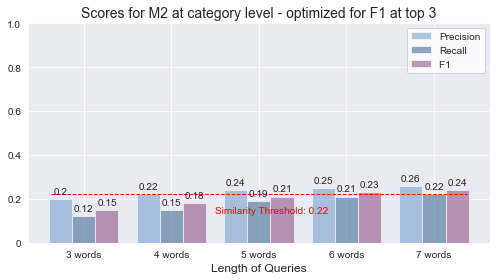

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


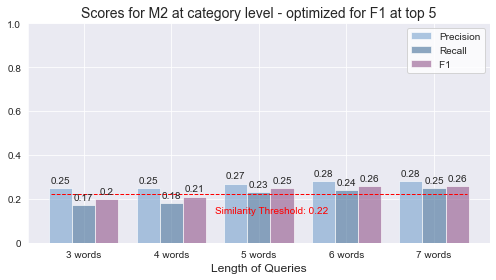

In [22]:
# TOP 3 M2R2 AT CATEGORY LEVEL
labels = "n_words"
filename = 'visualizations/M2scores_at_top3.png'
threshold = 0.22
title = 'Scores for M2 at category level - optimized for F1 at top 3'
bar_chart(df_or3 , labels, title, filename, threshold)

# TOP 5 CATEGORY AT CATEGORY LEVEL
labels = "n_words"
filename = 'visualizations/M2scores_at_top5.png'
title = 'Scores for M2 at category level - optimized for F1 at top 5'
bar_chart(df_or5 , labels, title, filename, threshold)



### M2+R2 SCORES BY SIMILIRATY THRESHOLD

C:\Users\fredg\AppData\Local\Temp\ipykernel_88380\707727782.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels,size=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\fredg\AppData\Local\Temp\ipykernel_88380\707727782.py:21: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate('Similarity Threshold: {}'.format(threshold), (0.65,threshold -0.055),


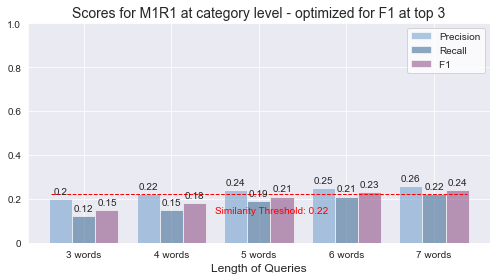

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


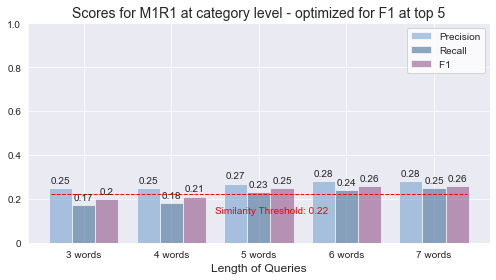

In [23]:
# TOP 3 ORIGINAL M2R1 MODEL
labels = "n_words"
filename = 'visualizations/scores_M2R1_at_top3.png'
threshold = 0.22
title = 'Scores for M1R1 at category level - optimized for F1 at top 3'
bar_chart(df_or3, labels, title, filename, threshold)

# TOP 5 ORIGINAL M2R1 MODEL
labels = "n_words"
filename = 'visualizations/scores_M2R1_at_top5.png'
title = 'Scores for M1R1 at category level - optimized for F1 at top 5'
threshold = 0.22
bar_chart(df_or5, labels, title, filename, threshold)


In [25]:
filename = "df_results.csv"
df_full = pd.read_csv(filename)
df_full["TP rate"] = np.round(df_full["TP"] / (df_full["TP"] + df_full["FN"]),2)
df_full["FP rate"] = np.round(df_full["FP"] / (df_full["FP"] + df_full["TN"]),2)
df_reduced = df_full[df_full["TOP_N"] == 3][["n_words",'threshold','Precision','Recall',"F1", "TP rate", "FP rate"]]
df_reduced["n_words"] = df_reduced["n_words"].apply(lambda x: "{} words".format(str(int(x))))
df_rec = df_reduced[df_reduced["n_words"] == "5 words"][["Precision",'Recall',"TP rate", "FP rate"]]
df_reduced.head(50)

df_reduced.columns = ['Query length', 'Similarity threshold', 'Precision score','Recall score', "F1 score", "TP rate", "FP rate"]

In [50]:


def chart_with_tooltip(source, x, y, color, tooltip, title, chart_type):
    domain = source[color].unique()
    # range_ = ["#92568B","#79A3CE", "#49BCDF", "#16D4D9", "#57E7BB"][:len(domain)]
    range_ = ["#57E7BB","#16D4D9", "#49BCDF", "#79A3CE", "#92568B"][:len(domain)]
    
    chart1 = alt.Chart(df_reduced).mark_line().encode(
            alt.X('{}:Q'.format(x)),
            alt.Y('{}:Q'.format(y)),
            color = alt.Color('{}:N'.format(color), scale=alt.Scale(domain=domain, range=range_)),
            tooltip="{}:Q".format(tooltip))

    nearest = alt.selection(type='single', nearest=True, on='mouseover', fields=[x], empty='none')

        # The basic line
    
    line = alt.Chart(source).mark_line(interpolate='basis').encode(
            alt.X('{}:Q'.format(x)),
            alt.Y('{}:Q'.format(y)),
            color = alt.Color('{}:N'.format(color), scale=alt.Scale(domain=domain, range=range_)))
    
    if chart_type == "point":    
        point = alt.Chart(source).mark_point(interpolate='basis').encode(
                alt.X('{}:Q'.format(x)),
                alt.Y('{}:Q'.format(y)),
                color = alt.Color('{}:N'.format(color), scale=alt.Scale(domain=domain, range=range_)))

        # Transparent selectors across the chart. This is what tells us
        # the x-value of the cursor
    selectors = alt.Chart(source).mark_point().encode(
            x='{}:Q'.format(x),
            opacity=alt.value(0),
        ).add_selection(
            nearest)

        # Draw points on the line, and highlight based on selection
    points = line.mark_point().encode(opacity=alt.condition(nearest, alt.value(1), alt.value(0))    )

        # Draw text labels near the points, and highlight based on selection
    text = line.mark_text(align='left', dx=5, dy=-5).encode(text=alt.condition(nearest, 'F1 score:Q', alt.value(' ')))

        # Draw a rule at the location of the selection
    rules = alt.Chart(source).mark_rule(color='gray').encode(
            x='{}:Q'.format(x),
        ).transform_filter(
            nearest
        )
        # Put the five layers into a chart and bind the data
     
    if chart_type == "point":
        chart = alt.layer(
            point, selectors, points, rules, text
        ).properties(
            width=400, height=300,title='{}'.format(title)
        ).configure(background='#F2F2F2')
    else:
        
        
        chart = alt.layer(
                line, selectors, points, rules, text
            ).properties(
                width=400, height=300, title='{}'.format(title)
            ).configure(background='#F2F2F2')

    return chart 
source = df_reduced
x = "Similarity threshold"
y = "F1 score"
color = "Query length"
tooltip = "F1 score"
chart_type = "line"
title = 'F1 score by similiraty threshold - M2+R2 model at Rank top 3'
chart_with_tooltip(source, x, y, color, tooltip, title, chart_type)


alt.LayerChart(...)

In [51]:
y = "Recall score"
title = 'Recall score by similiraty threshold - M2+R2 model at Rank top 3'
chart_with_tooltip(source, x, y, color, tooltip, title, chart_type)

alt.LayerChart(...)

In [52]:
y = "Precision score"
title = 'Precision score by similiraty threshold - M2+R2 model at Rank top 3'
chart_with_tooltip(source, x, y, color, tooltip, title, chart_type)

alt.LayerChart(...)

In [53]:
source = df_reduced
x = 'FP rate'
y = 'TP rate'
color = "Query length"
tooltip = 'TP rate'
title = " TBD"
chart_type = "point"
title = 'TP vs FP score - M2+R2 model at Rank top 3'
chart_with_tooltip(source, x, y, color, tooltip, title,chart_type)



alt.LayerChart(...)

In [333]:
# threshold x and F1 in y for 3,4,5,6,7 words
# threshold x and recall in y 3,4,5,6,7 words line plot chart
# aggregated chart with all models with comparative results at 5 words
# word to vec al final
# tablas nice de resultados también


In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()